## Pandas
* numpy üzerine inşa edilmiştir.
* Çalışılılan verinin 5-6 katı kadar memory olması beklenir.
* Daha büyük veri kümeleri için Lazy çalışan Vaex kütüphanesi kullanılabilir.
    * Spark (pyspark) ekosistemi veya hadoop kullanılabilir.
* 2 tip mevcut
    1. Series
        * kolona benzetebiliriz. Aynı tipten veri tutar.
        * Sıra numarası ve etiket mevcut.
    2. DataFrame
        * iki boyutludur. Tabloya benzetebiliriz.
        * satır ve sutunların, sıra numarası ve etiketi mevcut.
* Broadcast özelliği her iki nesnede de mevcut.

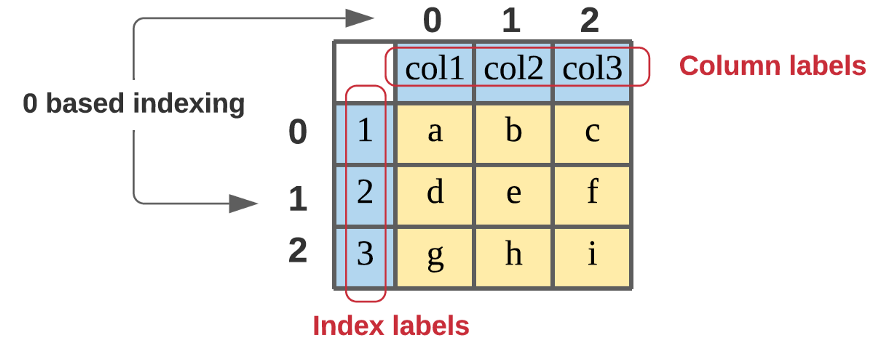

In [1]:
import numpy as np
import pandas as pd

In [3]:
#seri
pd.Series([11,22,33]) #satır etiketi ve sıra numarası bulunur.

pd.Series([11,22,33], dtype="str", index=["s1","s2","s3"]) 
#index satır etiketidir. satır etiketi vermezse sıra numarası etiket olur.

s1    11
s2    22
s3    33
dtype: object

In [31]:
#DataFrame
departman = pd.DataFrame(
                    data=[
                            (1,"Departman A"),
                            (2,"Departman B"),
                            (3,"Departman C")
                        ],
                        columns=["DepId","DepAd"]                        
                        )

#-
departman

# DepId kolonu satır etiketi olsun
departman.set_index("DepId", inplace=True) #orjinalini inplace=True ile etkiler.

#
departman.sort_index(ascending=False)
departman.sort_values(by="DepAd")


#indexi sıfırlamak
departman.reset_index()

DepId        DepAd
0      1  Departman A
1      2  Departman B
2      3  Departman C

In [18]:
#DataFrame2
#dict keyleri kolon adı olur.
ekipEfor = pd.DataFrame(
                data= {
                        "Id":[1,2,3,4,5],
                        "Ad":["Ali","Veli","Ayşe","Fatma","Tonguç"],
                        "Cinsiyet":["E","E",None,"K","E"],
                        "Miktar":[120,None,250,350,None]
                        },
                columns=["Id","Ad","Cinsiyet","Miktar","DepId"], #yeni kolon eklenebilir
                index=["İstanbul","İstanbul","Ankara","Ankara","US"]
)

#--
ekipEfor

Id      Ad Cinsiyet  Miktar DepId
İstanbul   1     Ali        E   120.0   NaN
İstanbul   2    Veli        E     NaN   NaN
Ankara     3    Ayşe     None   250.0   NaN
Ankara     4   Fatma        K   350.0   NaN
US         5  Tonguç        E     NaN   NaN

In [29]:
ekipEfor.rename(columns={"Miktar":"Uretim"}, index={"Ankara":"Bolu"}, inplace=True)

#---
ekipEfor.columns #kolonları görebilriiz.
ekipEfor.columns = ['Id', 'Ad', 'Cinsiyet', 'Uretim', 'DepId']

#
ekipEfor.index
ekipEfor.index.name="Lokasyon" #indexe ana başlık ekledik.

# Farklı teknikler bir arada kullanılabilir.
ekipEfor.index = np.where(ekipEfor.index == "İstanbul", "Çorum", ekipEfor.index)

#
ekipEfor

Id      Ad Cinsiyet  Uretim DepId
Çorum   1     Ali        E   120.0   NaN
Çorum   2    Veli        E     NaN   NaN
Bolu    3    Ayşe     None   250.0   NaN
Bolu    4   Fatma        K   350.0   NaN
US      5  Tonguç        E     NaN   NaN

#### Hakkında bilgi almak

In [38]:
#ekip = ekipEfor #direkt atama yapıldığında her iki değişken de etkilenir.
ekip = ekipEfor

#memoryde aynı yeri gösteriyoru
print(id(ekip), id(ekipEfor))
print(ekip is ekipEfor)


ekip = ekipEfor.copy() #verinin kopyasını alır memoryde farklı yerleri gösterir.
print(ekip is ekipEfor)

3168445103552 3168445103552
True
False


In [54]:
ekip.shape
ekip.size
#len(ekip)

#--
ekip = ekip.astype({
                        "Id":np.int8,
                        "Uretim":np.float16,
                        "Ad":str
                    })
#
ekip.info() #240.0+ bytes >  175.0+ bytes bytes

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Çorum to US
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        5 non-null      int8   
 1   Ad        5 non-null      object 
 2   Cinsiyet  4 non-null      object 
 3   Uretim    3 non-null      float16
 4   DepId     0 non-null      object 
dtypes: float16(1), int8(1), object(3)
memory usage: 175.0+ bytes


In [58]:
ekip.head(2) #varsayılan 5 satır
ekip.tail(2) #alttan kaç satır

Id      Ad Cinsiyet  Uretim DepId
Bolu   4   Fatma        K   350.0   NaN
US     5  Tonguç        E     NaN   NaN

In [60]:
ekip.describe() #sayısal alanlarla ilgili istaitstik
ekip.describe().T

count   mean         std    min    25%    50%    75%    max
Id        5.0    3.0    1.581139    1.0    2.0    3.0    4.0    5.0
Uretim    3.0  240.0  115.312500  120.0  185.0  250.0  300.0  350.0

### Bazı kullnışlı foksiyonlar

In [65]:
#axis verilebilir
ekip.sum() #varsayılan axis=0
ekip.sum(axis=1) 

#
ekip.count() #null olmayanlar

#min,max, std, mean, median, cumsum verilebilir.

<ipython-input-65-e284c7f41ede>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ekip.sum() #varsayılan axis=0
<ipython-input-65-e284c7f41ede>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ekip.sum(axis=1)


Id          5
Ad          5
Cinsiyet    4
Uretim      3
DepId       0
dtype: int64

In [68]:
ekip.nunique() #kaç tane benzersiz kayıt var
#ekip.nunique(axis=1)

Id          5
Ad          5
Cinsiyet    2
Uretim      3
DepId       0
dtype: int64

In [73]:
#seri
ekip.Uretim.mean() #ortalama üretimi verir.

#
ekip.Cinsiyet.value_counts() #hangi değerden kaç tane var.

#count(distinct ) kaç farklı değer var.
ekip.Cinsiyet.value_counts().count()

2

### Null (None, NaN, N/A) Değerler

* `isna` veya `isnull` hücreleri kontrol eder. None olanlar True gelir.
* `notna` ve `notnull` isna nın tersi
* `all()` hepsi True mu?, `any()` hiç True var mı?
* `fillna` ile null alanlara değer atarız.
* `dropna` ile nulları kaldırabiliriz.

Not: fillna ve dropna axis alır. Yapılan işlem orjinalini etkilemez.

In [80]:
ekip.isna() #isnull()

#
#axis verilebilir
ekip.isna().any() #hiç True var mı? yani null var mı?
ekip.isna().all() #tamamı null mı?

#tabloda hiç null var mı?
ekip.isna().any().any()

True

In [93]:
ekip.Uretim.isna().sum() #üretim kolonunda kaç null var?

#hangileri null
ekip.Uretim.isna()
ekip.Uretim.isna().tolist()

#
ekip[ekip.Uretim.isna()] #tüm kolonlar gelecekse
ekip.loc[ekip.Uretim.isna(), ["Ad","Cinsiyet","Uretim"]] #etiketler kullanılackasa
ekip.iloc[ekip.Uretim.isna().tolist(), 1:4] #tolist ileliste yapmak gerekiyor. sıra numarası kullanılacaksa

#etiket üzerinden slicer yapılabilir.
ekip.loc[ekip.Uretim.isna(), "Ad":"Uretim"]

Ad Cinsiyet  Uretim
Çorum    Veli        E     NaN
US     Tonguç        E     NaN

In [ ]:
#Soru:
#fillna kullanadan NULL olan üretimlere ortalama üretimi basalım.